tfidf

In [83]:

from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from scipy.sparse import hstack
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import normalize
import numpy as np

In [2]:
# Import finalized dataset as pandas data frame.
df_jobads = pd.read_csv('data_jobads_final.csv', index_col=None)

# Apply the final touch.
df_jobads['job_description'] = df_jobads['job_description'].str.replace('\n', ' ')
df_jobads = df_jobads.dropna()
df_jobads = df_jobads.reset_index(drop=True)

df_jobads.head(2)

,title,id,link,date,job_description,label
0,assistant director of nursing,sj_3c7e64c7996bb9d6,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...,"January 10, 2024",silver stream healthcare group offer great emp...,registered_nurse
1,clinical nurse manager (cnm),sj_358f1f68cde928c4,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...,unknown,create a better future for yourself recruitne...,registered_nurse


In [3]:
# Check the 'label' column for unique values.
labels = df_jobads['label'].unique().tolist()

print(labels)

['registered_nurse', 'electrician', 'data_analyst']


In [4]:
# Create 'id2label', 'label2id' variables for mapping the labels.
num_labels = len(labels)
id2label = {id:label for id, label in enumerate(labels)}
label2id = {label: id for id, label in enumerate(labels)}

print(id2label)
print(label2id)

{0: 'registered_nurse', 1: 'electrician', 2: 'data_analyst'}
{'registered_nurse': 0, 'electrician': 1, 'data_analyst': 2}


In [5]:
# Encode the 'label' column.
df_jobads['label_encoded'] = df_jobads.label.map(lambda x: label2id[x.strip()])

df_jobads.head(2)

,title,id,link,date,job_description,label,label_encoded
0,assistant director of nursing,sj_3c7e64c7996bb9d6,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...,"January 10, 2024",silver stream healthcare group offer great emp...,registered_nurse,0
1,clinical nurse manager (cnm),sj_358f1f68cde928c4,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...,unknown,create a better future for yourself recruitne...,registered_nurse,0


In [6]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\temulenbd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\temulenbd\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\temulenbd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    # Removing punctuation
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Removing stopwords and lemmatization
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    processed_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Re-joining tokens
    processed_text = ' '.join(processed_tokens)
    return processed_text

In [8]:
df_jobads['processed_job_description'] = df_jobads['job_description'].apply(preprocess_text)

df_jobads.head(2)

,title,id,link,date,job_description,label,label_encoded,processed_job_description
0,assistant director of nursing,sj_3c7e64c7996bb9d6,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...,"January 10, 2024",silver stream healthcare group offer great emp...,registered_nurse,0,silver stream healthcare group offer great emp...
1,clinical nurse manager (cnm),sj_358f1f68cde928c4,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...,unknown,create a better future for yourself recruitne...,registered_nurse,0,create better future recruitnet international ...


In [10]:
# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(df_jobads['processed_job_description'], df_jobads['label_encoded'], test_size=0.3, random_state=630)
print('TOTAL shape:', df_jobads.shape)
print('TRAINING shape:', X_train.shape)
print('TEST shape:', X_test.shape)

TOTAL shape: (1166, 8)
TRAINING shape: (816,)
TEST shape: (350,)


In [11]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [12]:
bow_vectorizer = CountVectorizer()
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

In [13]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [14]:
X_train_combined = hstack([X_train_bow, X_train_tfidf])
X_test_combined = hstack([X_test_bow, X_test_tfidf])

Multinomial Naive Bayes

In [15]:
clf = MultinomialNB()

# Training the model with combined features
clf.fit(X_train_combined, y_train)

# Making predictions
preds = clf.predict(X_test_combined)
labels = y_test

classification report: MULTINOMIAL NAIVE BAYES (TF-IDF + BOW)

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       182
           1       0.98      0.92      0.95        49
           2       0.97      0.99      0.98       119

    accuracy                           0.99       350
   macro avg       0.98      0.97      0.98       350
weighted avg       0.99      0.99      0.99       350



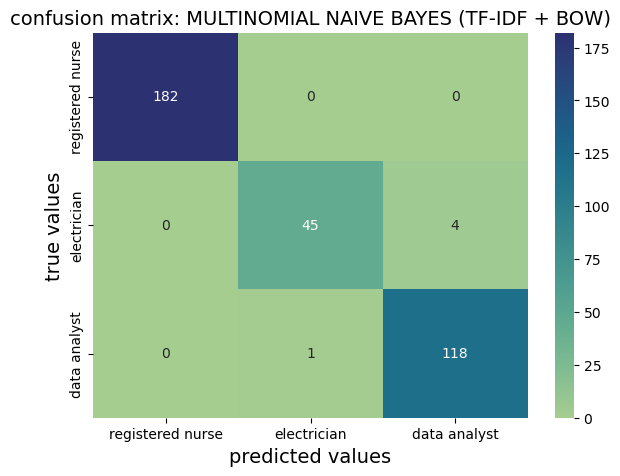

In [16]:
print('classification report: MULTINOMIAL NAIVE BAYES (TF-IDF + BOW)\n\n', classification_report(labels, preds))

cm_labels = ['registered nurse', 'electrician', 'data analyst']
cm_matrix = confusion_matrix(labels, preds)
cm_title = 'confusion matrix: MULTINOMIAL NAIVE BAYES (TF-IDF + BOW)'


plt.figure(figsize=(7, 5))
sns.heatmap(cm_matrix, annot=True, fmt="d", cmap='crest', xticklabels=cm_labels, yticklabels=cm_labels)

plt.title(cm_title, fontsize=14)
plt.xlabel('predicted values', fontsize=14)
plt.ylabel('true values', fontsize=14)

plt.show()

logistic regression

In [17]:
# Classifier - Using Logistic Regression
clf = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence

# Training the model with combined features
clf.fit(X_train_combined, y_train)

# Making predictions
preds = clf.predict(X_test_combined)
labels = y_test

classification report: LOGISTIC REGRESSION (TF-IDF + BOW)

               precision    recall  f1-score   support

           0       0.98      1.00      0.99       182
           1       1.00      0.90      0.95        49
           2       0.98      0.99      0.99       119

    accuracy                           0.98       350
   macro avg       0.99      0.96      0.97       350
weighted avg       0.98      0.98      0.98       350



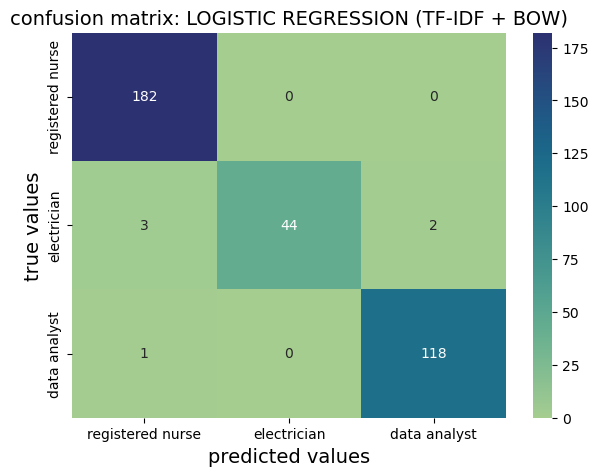

In [18]:
print('classification report: LOGISTIC REGRESSION (TF-IDF + BOW)\n\n', classification_report(labels, preds))

cm_labels = ['registered nurse', 'electrician', 'data analyst']
cm_matrix = confusion_matrix(labels, preds)
cm_title = 'confusion matrix: LOGISTIC REGRESSION (TF-IDF + BOW)'


plt.figure(figsize=(7, 5))
sns.heatmap(cm_matrix, annot=True, fmt="d", cmap='crest', xticklabels=cm_labels, yticklabels=cm_labels)

plt.title(cm_title, fontsize=14)
plt.xlabel('predicted values', fontsize=14)
plt.ylabel('true values', fontsize=14)

plt.show()

Support Vector Machine (SVM)

In [19]:
clf = SVC(kernel='linear')  # 'linear' kernel is often a good choice for text data
# Training the model with combined features
clf.fit(X_train_combined, y_train)
# Making predictions
preds = clf.predict(X_test_combined)
labels = y_test

classification report: SUPPORT VECTOR MACHINE (TF-IDF + BOW)

               precision    recall  f1-score   support

           0       0.98      1.00      0.99       182
           1       1.00      0.90      0.95        49
           2       0.98      0.99      0.99       119

    accuracy                           0.98       350
   macro avg       0.99      0.96      0.97       350
weighted avg       0.98      0.98      0.98       350



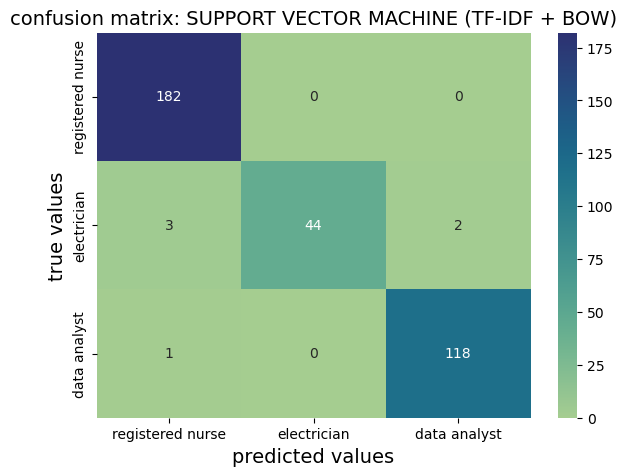

In [20]:
print('classification report: SUPPORT VECTOR MACHINE (TF-IDF + BOW)\n\n', classification_report(labels, preds))

cm_labels = ['registered nurse', 'electrician', 'data analyst']
cm_matrix = confusion_matrix(labels, preds)
cm_title = 'confusion matrix: SUPPORT VECTOR MACHINE (TF-IDF + BOW)'


plt.figure(figsize=(7, 5))
sns.heatmap(cm_matrix, annot=True, fmt="d", cmap='crest', xticklabels=cm_labels, yticklabels=cm_labels)

plt.title(cm_title, fontsize=14)
plt.xlabel('predicted values', fontsize=14)
plt.ylabel('true values', fontsize=14)

plt.show()

random forest

In [21]:
# Initialize the Random Forest classifier
# The number of trees in the forest (n_estimators) is a key parameter to tune
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model with combined features
clf.fit(X_train_combined, y_train)

# Making predictions
preds = clf.predict(X_test_combined)
labels = y_test

classification report: RANDOM FOREST (TF-IDF + BOW)

               precision    recall  f1-score   support

           0       0.98      1.00      0.99       182
           1       1.00      0.90      0.95        49
           2       0.98      0.99      0.98       119

    accuracy                           0.98       350
   macro avg       0.99      0.96      0.97       350
weighted avg       0.98      0.98      0.98       350



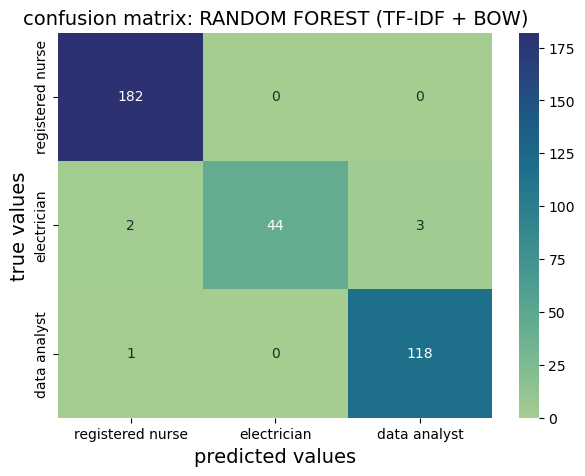

In [22]:
print('classification report: RANDOM FOREST (TF-IDF + BOW)\n\n', classification_report(labels, preds))

cm_labels = ['registered nurse', 'electrician', 'data analyst']
cm_matrix = confusion_matrix(labels, preds)
cm_title = 'confusion matrix: RANDOM FOREST (TF-IDF + BOW)'


plt.figure(figsize=(7, 5))
sns.heatmap(cm_matrix, annot=True, fmt="d", cmap='crest', xticklabels=cm_labels, yticklabels=cm_labels)

plt.title(cm_title, fontsize=14)
plt.xlabel('predicted values', fontsize=14)
plt.ylabel('true values', fontsize=14)

plt.show()

## 3. Embedding (TF-IDF plus BoW)

**job seeker**

In [40]:
# Testing model using data from experiment participants.
df_jobseeker = pd.read_csv('data_jobseeker.csv', index_col=None)
df_jobseeker['professional_qualifications'] = df_jobseeker.education + ". " + df_jobseeker.skill + ". " + df_jobseeker.experience + '.'
df_jobseeker.drop(['education', 'skill', 'experience'], axis=1, inplace=True)

df_jobseeker.head()

,participant,data_collection,date,location,preferred_position,professional_qualifications
0,user_1,voice call,2023-12-17 15:30:00,"dublin, ireland",registered nurse,bachelor's degree: critical care nursing. pati...
1,user_2,voice call,2023-12-27 11:50:00,"dublin, ireland",electrician,"high school diploma, vocational electrician ce..."
2,user_3,google form,2023-12-31 13:39:00,"dublin, ireland",data analyst,"degree: master of science in data analytics, b..."


In [42]:
df_jobseeker['preprocessed_pq'] = df_jobseeker['professional_qualifications'].apply(preprocess_text)

df_jobseeker.head(3)

,participant,data_collection,date,location,preferred_position,professional_qualifications,preprocessed_pq
0,user_1,voice call,2023-12-17 15:30:00,"dublin, ireland",registered nurse,bachelor's degree: critical care nursing. pati...,bachelor degree critical care nursing patient ...
1,user_2,voice call,2023-12-27 11:50:00,"dublin, ireland",electrician,"high school diploma, vocational electrician ce...",high school diploma vocational electrician cer...
2,user_3,google form,2023-12-31 13:39:00,"dublin, ireland",data analyst,"degree: master of science in data analytics, b...",degree master science data analytics bachelor ...


**job ads**

In [48]:
df_cos = df_jobads
df_cos.head(2)

,title,id,link,date,job_description,label,label_encoded,processed_job_description
0,assistant director of nursing,sj_3c7e64c7996bb9d6,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...,"January 10, 2024",silver stream healthcare group offer great emp...,registered_nurse,0,silver stream healthcare group offer great emp...
1,clinical nurse manager (cnm),sj_358f1f68cde928c4,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...,unknown,create a better future for yourself recruitne...,registered_nurse,0,create better future recruitnet international ...


merging

In [49]:
empty_rows = pd.DataFrame([[""] * len(df_cos.columns)] * 3, columns=df_cos.columns)
df_cos = pd.concat([empty_rows, df_cos], ignore_index=True)
df_cos.head()

,title,id,link,date,job_description,label,label_encoded,processed_job_description
0,,,,,,,,
1,,,,,,,,
2,,,,,,,,
3,assistant director of nursing,sj_3c7e64c7996bb9d6,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...,"January 10, 2024",silver stream healthcare group offer great emp...,registered_nurse,0,silver stream healthcare group offer great emp...
4,clinical nurse manager (cnm),sj_358f1f68cde928c4,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...,unknown,create a better future for yourself recruitne...,registered_nurse,0,create better future recruitnet international ...


In [53]:
values_to_add = df_jobseeker['preprocessed_pq'].tolist()[:3]
df_cos['processed_job_description'].iloc[:3] = values_to_add

df_cos.head()

,title,id,link,date,job_description,label,label_encoded,processed_job_description
0,,,,,,,,bachelor degree critical care nursing patient ...
1,,,,,,,,high school diploma vocational electrician cer...
2,,,,,,,,degree master science data analytics bachelor ...
3,assistant director of nursing,sj_3c7e64c7996bb9d6,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...,"January 10, 2024",silver stream healthcare group offer great emp...,registered_nurse,0,silver stream healthcare group offer great emp...
4,clinical nurse manager (cnm),sj_358f1f68cde928c4,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...,unknown,create a better future for yourself recruitne...,registered_nurse,0,create better future recruitnet international ...


In [77]:
tfidf_matrix = tfidf_vectorizer.fit_transform(df_cos['processed_job_description'])
bow_matrix = bow_vectorizer.fit_transform(df_cos['processed_job_description'])
combined_matrix = hstack([tfidf_matrix, bow_matrix])

# Convert each row of the TF-IDF matrix to a list and store in a new DataFrame column
df_cos['vectors'] = list(combined_matrix.toarray())
df_cos.head()

,title,id,link,date,job_description,label,label_encoded,processed_job_description,vectors
0,,,,,,,,bachelor degree critical care nursing patient ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,,,,,,,,high school diploma vocational electrician cer...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,,,,,,,,degree master science data analytics bachelor ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,assistant director of nursing,sj_3c7e64c7996bb9d6,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...,"January 10, 2024",silver stream healthcare group offer great emp...,registered_nurse,0,silver stream healthcare group offer great emp...,"[0.0, 0.0, 0.04749643991878368, 0.0, 0.0, 0.0,..."
4,clinical nurse manager (cnm),sj_358f1f68cde928c4,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...,unknown,create a better future for yourself recruitne...,registered_nurse,0,create better future recruitnet international ...,"[0.0, 0.0, 0.0, 0.14488240823917486, 0.0, 0.0,..."


Normalization and Similarity Calculation: If you plan to use these vectors for similarity calculations (e.g., cosine similarity), ensure that the vectors are normalized if your downstream application requires it. TF-IDF vectors are typically normalized by the TfidfVectorizer, but combining them with BoW vectors (which are not normalized by default) means you might need to apply normalization to the combined vectors manually.

For cosine similarity calculations, especially in the context of text processing with methods like TF-IDF or Bag of Words (BoW), L2 normalization (also known as Euclidean normalization) is the most suitable and commonly used normalization technique. L2 normalization adjusts the vectors in such a way that they have a unit length (Euclidean norm) of 1. This normalization is crucial for cosine similarity because it ensures that the similarity measure focuses on the direction of the vectors rather than their magnitude, which aligns with the definition and intention of cosine similarity.

In [79]:
vectors_array = pd.DataFrame(df_cos['vectors'].tolist())
vectors_array.head()

,0,1,2,3,4,5,6,7,8,9,...,20152,20153,20154,20155,20156,20157,20158,20159,20160,20161
0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.047496,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.144882,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
normalized_vectors = normalize(vectors_array, norm='l2', axis=1)
normalized_vectors

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00959848, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [81]:
df_cos['vectors'] = normalized_vectors.tolist()
df_cos.head()

,title,id,link,date,job_description,label,label_encoded,processed_job_description,vectors
0,,,,,,,,bachelor degree critical care nursing patient ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,,,,,,,,high school diploma vocational electrician cer...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,,,,,,,,degree master science data analytics bachelor ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,assistant director of nursing,sj_3c7e64c7996bb9d6,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...,"January 10, 2024",silver stream healthcare group offer great emp...,registered_nurse,0,silver stream healthcare group offer great emp...,"[0.0, 0.0, 0.0016647493576457985, 0.0, 0.0, 0...."
4,clinical nurse manager (cnm),sj_358f1f68cde928c4,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...,unknown,create a better future for yourself recruitne...,registered_nurse,0,create better future recruitnet international ...,"[0.0, 0.0, 0.0, 0.008464120664617068, 0.0, 0.0..."


In [86]:
# Convert the 'vectors' column into a NumPy array for efficient calculations
vectors = np.array(df_cos['vectors'].tolist())

# Calculate cosine similarity
# Reshape the first vector to match the required shape for cosine_similarity calculations
first_vector = vectors[0].reshape(1, -1)

# Calculate cosine similarity between the first vector and all vectors in the dataset
cosine_similarities = cosine_similarity(first_vector, vectors).flatten()

# Add the cosine similarity scores to the DataFrame as a new column
df_cos['cos_user1'] = cosine_similarities

# Display the updated DataFrame
df_cos.head()

,title,id,link,date,job_description,label,label_encoded,processed_job_description,vectors,cos_user1
0,,,,,,,,bachelor degree critical care nursing patient ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.000000
1,,,,,,,,high school diploma vocational electrician cer...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.057004
2,,,,,,,,degree master science data analytics bachelor ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.075081
3,assistant director of nursing,sj_3c7e64c7996bb9d6,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...,"January 10, 2024",silver stream healthcare group offer great emp...,registered_nurse,0,silver stream healthcare group offer great emp...,"[0.0, 0.0, 0.0016647493576457985, 0.0, 0.0, 0....",0.301457
4,clinical nurse manager (cnm),sj_358f1f68cde928c4,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...,unknown,create a better future for yourself recruitne...,registered_nurse,0,create better future recruitnet international ...,"[0.0, 0.0, 0.0, 0.008464120664617068, 0.0, 0.0...",0.301988


Key Differences
1. Interface and Input Types: PyTorch's function is designed for tensors and deep learning models, while scikit-learn's is geared towards traditional ML models with NumPy arrays or sparse matrices.
2. Dimensionality Control: PyTorch allows specifying the dimension along which to compute similarity, which is useful for batch operations in neural networks. Scikit-learn computes similarity across the feature dimension by default, suited for pairwise comparisons in ML tasks.
3. Both functions calculate the cosine similarity, which measures the cosine of the angle between two vectors, indicating how similar they are in orientation in the vector space. The choice between them depends on the specific requirements of your project, including whether you're working within a deep learning context (PyTorch) or a more traditional machine learning setup (scikit-learn).

In [87]:
# Convert the 'vectors' column into a NumPy array for efficient calculations
vectors = np.array(df_cos['vectors'].tolist())

# Calculate cosine similarity
# Reshape the first vector to match the required shape for cosine_similarity calculations
first_vector = vectors[1].reshape(1, -1)

# Calculate cosine similarity between the first vector and all vectors in the dataset
cosine_similarities = cosine_similarity(first_vector, vectors).flatten()

# Add the cosine similarity scores to the DataFrame as a new column
df_cos['cos_user2'] = cosine_similarities

# Display the updated DataFrame
df_cos.head()

,title,id,link,date,job_description,label,label_encoded,processed_job_description,vectors,cos_user1,cos_user2
0,,,,,,,,bachelor degree critical care nursing patient ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.000000,0.057004
1,,,,,,,,high school diploma vocational electrician cer...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.057004,1.000000
2,,,,,,,,degree master science data analytics bachelor ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.075081,0.070128
3,assistant director of nursing,sj_3c7e64c7996bb9d6,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...,"January 10, 2024",silver stream healthcare group offer great emp...,registered_nurse,0,silver stream healthcare group offer great emp...,"[0.0, 0.0, 0.0016647493576457985, 0.0, 0.0, 0....",0.301457,0.022477
4,clinical nurse manager (cnm),sj_358f1f68cde928c4,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...,unknown,create a better future for yourself recruitne...,registered_nurse,0,create better future recruitnet international ...,"[0.0, 0.0, 0.0, 0.008464120664617068, 0.0, 0.0...",0.301988,0.037650


In [88]:
# Convert the 'vectors' column into a NumPy array for efficient calculations
vectors = np.array(df_cos['vectors'].tolist())

# Calculate cosine similarity
# Reshape the first vector to match the required shape for cosine_similarity calculations
first_vector = vectors[2].reshape(1, -1)

# Calculate cosine similarity between the first vector and all vectors in the dataset
cosine_similarities = cosine_similarity(first_vector, vectors).flatten()

# Add the cosine similarity scores to the DataFrame as a new column
df_cos['cos_user3'] = cosine_similarities

# Display the updated DataFrame
df_cos.head()

,title,id,link,date,job_description,label,label_encoded,processed_job_description,vectors,cos_user1,cos_user2,cos_user3
0,,,,,,,,bachelor degree critical care nursing patient ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.000000,0.057004,0.075081
1,,,,,,,,high school diploma vocational electrician cer...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.057004,1.000000,0.070128
2,,,,,,,,degree master science data analytics bachelor ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.075081,0.070128,1.000000
3,assistant director of nursing,sj_3c7e64c7996bb9d6,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...,"January 10, 2024",silver stream healthcare group offer great emp...,registered_nurse,0,silver stream healthcare group offer great emp...,"[0.0, 0.0, 0.0016647493576457985, 0.0, 0.0, 0....",0.301457,0.022477,0.033491
4,clinical nurse manager (cnm),sj_358f1f68cde928c4,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...,unknown,create a better future for yourself recruitne...,registered_nurse,0,create better future recruitnet international ...,"[0.0, 0.0, 0.0, 0.008464120664617068, 0.0, 0.0...",0.301988,0.037650,0.005109


sklearn.metrics.pairwise.cosine_similarity
1. Library: scikit-learn
2. Use Case: Designed for machine learning applications, particularly with data in matrix form.
3. Input: Expects NumPy arrays or sparse matrices as input. It can compute the similarity between all pairs in two sets of vectors or within a single set.
4. Output: Returns a NumPy array containing the cosine similarity scores between all pairs of vectors.
5. Flexibility: Primarily used for pairwise similarity calculations, without explicit control over the dimension (assumes the last dimension represents features).
Example Usage:

In [89]:
# Slicing the DataFrame to exclude the first three rows
df_cos = df_cos.iloc[3:].reset_index(drop=True)


In [90]:
df_cos

,title,id,link,date,job_description,label,label_encoded,processed_job_description,vectors,cos_user1,cos_user2,cos_user3
0,assistant director of nursing,sj_3c7e64c7996bb9d6,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...,"January 10, 2024",silver stream healthcare group offer great emp...,registered_nurse,0,silver stream healthcare group offer great emp...,"[0.0, 0.0, 0.0016647493576457985, 0.0, 0.0, 0....",0.301457,0.022477,0.033491
1,clinical nurse manager (cnm),sj_358f1f68cde928c4,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...,unknown,create a better future for yourself recruitne...,registered_nurse,0,create better future recruitnet international ...,"[0.0, 0.0, 0.0, 0.008464120664617068, 0.0, 0.0...",0.301988,0.037650,0.005109
2,registered nurse,job_4e16e9830b072344,https://ie.indeed.com/rc/clk?jk=4e16e9830b0723...,"January 10, 2024","access healthcare, one of irelands leading hea...",registered_nurse,0,access healthcare one ireland leading healthca...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.182783,0.034201,0.043022
3,staff nurse,job_25a417a6373967b4,https://ie.indeed.com/rc/clk?jk=25a417a6373967...,"January 10, 2024",are you a dedicated and compassionate staff nu...,registered_nurse,0,dedicated compassionate staff nurse looking ex...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.104660,0.024529,0.013206
4,clinical research nurse - cardiology (cnm2),job_303eee71cce63f3d,https://ie.indeed.com/rc/clk?jk=303eee71cce63f...,"January 10, 2024",clinical research nurse cardiology cnm2 we a...,registered_nurse,0,clinical research nurse cardiology cnm2 seekin...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.167021,0.027480,0.034735
...,...,...,...,...,...,...,...,...,...,...,...,...
1161,junior analyst- private debt investments - fix...,job_ce346c7bfdd6dced,https://ie.indeed.com/rc/clk?jk=ce346c7bfdd6dc...,"before December 21, 2023",the successful candidate will have exposure to...,data_analyst,2,successful candidate exposure level firm daily...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.060407,0.014141,0.053320
1162,strategy analyst - tech,job_18b9089f580d5d70,https://ie.indeed.com/rc/clk?jk=18b9089f580d5d...,"before December 21, 2023",sector: fintech you will be a datadriven indiv...,data_analyst,2,sector fintech datadriven individual least 3 y...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.076102,0.014191,0.107636
1163,"financial analyst, retail",job_e6ba95f1a8debaa8,https://ie.indeed.com/rc/clk?jk=e6ba95f1a8deba...,"before December 21, 2023",our client are recognised as a market leader a...,data_analyst,2,client recognised market leader looking recrui...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.064772,0.012032,0.104310
1164,senior operations analyst (trade support),job_ac9aa90b2b36b178,https://ie.indeed.com/rc/clk?jk=ac9aa90b2b36b1...,"before December 21, 2023",the role our operations analysts are responsib...,data_analyst,2,role operation analyst responsible managing cl...,"[0.009598476983635714, 0.0, 0.0, 0.0, 0.0, 0.0...",0.099901,0.023354,0.069354


When comparing texts using TF-IDF (Term Frequency-Inverse Document Frequency) or BoW (Bag of Words) for methods such as cosine similarity, it's crucial to process all texts within the same feature space. This means that each text is transformed into a vector where each dimension corresponds to a specific term in the overall vocabulary of the dataset. 